In [35]:
import lyricsgenius as lg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spotipy
import time

from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

from spotipy.oauth2 import SpotifyClientCredentials
from requests.exceptions import Timeout



In [36]:
# artists = ['Logic', 'Rihanna', 'Frank Sinatra']


# def get_lyrics(arr, k):  # Write lyrics of k songs by each artist in arr
#     c = 0  # Counter
#     for name in arr:
#         try:
#             songs = (genius.search_artist(name, max_songs=k, sort='popularity')).songs
#             s = [song.lyrics for song in songs]
#             print("\n \n   <|endoftext|>   \n \n".join(s))  # Deliminator
#             c += 1
#             print(f"Songs grabbed:{len(s)}")
#         except:  #  Broad catch which will give us the name of artist and song that threw the exception
#             print(f"some exception at {name}: {c}")



In [37]:
all_top_songs = pd.read_excel('data/top_10000_songs_201129.xlsx', index_col=0) 

/Users/sam/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [38]:
year_dis_song = all_top_songs.groupby('Year')['Song'].count()

In [39]:
cur_songs_start = 5000
cur_songs_end = 6000
current_songs = all_top_songs[cur_songs_start:cur_songs_end]

In [40]:
current_songs

,PLACE,Artist,Song,Year,PLACE08,PLACE11,PLACE13,PLACE14,PLACE15,PLACE17,PLACE18
ID,,,,,,,,,,,
1847,5001,The Rolling Stones,Emotional Rescue,1980,2860.0,NaN,NaN,NaN,NaN,4154.0,4189.0
6293,5002,Erasure,A Little Respect,1988,NaN,NaN,NaN,4451.0,4839.0,4941.0,5026.0
13519,5003,"Jim Europe's 369th Infantry ""Hellfighters"" Band",Memphis Blues,1919,NaN,NaN,NaN,NaN,NaN,6579.0,6669.0
5404,5004,Belle and Sebastian,"Step into My Office, Baby",2003,NaN,NaN,NaN,5844.0,NaN,4578.0,4647.0
5999,5005,Death Cab for Cutie,Soul Meets Body,2005,NaN,NaN,NaN,2824.0,3451.0,4606.0,4715.0
...,...,...,...,...,...,...,...,...,...,...,...
16589,5996,Amen Dunes,Believe,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4541,5997,Badfinger,Without You,1970,NaN,NaN,2456.0,4295.0,NaN,6171.0,6235.0
6548,5998,Gerry and The Pacemakers,How Do You Do It?,1963,NaN,NaN,NaN,5331.0,3976.0,5981.0,6044.0


In [41]:
all_top_albums = pd.read_excel('data/top_3000_albums_201129.xls', index_col=0) 

In [10]:
year_dis_album = all_top_albums.groupby('Year')['Album'].count()

In [47]:

cur_album_start = 1884
cur_album_end = 2500
current_albums = all_top_albums[cur_album_start:cur_album_end]

In [48]:
current_albums

,PLACE,Artist,Album,Year,PLACE08,PLACE09,PLACE10,PLACE13,PLACE14,PLACE15,PLACE17,PLACE18
i,,,,,,,,,,,,
383,1885.0,Wild Tchoupitoulas,Wild Tchoupitoulas,1976,2053.0,1918.0,2010.0,1808.0,2238.0,2219.0,2311.0,2316.0
2381,1886.0,Curtis Mayfield,Curtis/Live!,1971,1515.0,1522.0,1646.0,1878.0,2198.0,2014.0,1941.0,1993.0
1679,1887.0,Dead Boys,Young Loud and Snotty,1977,1884.0,2133.0,2323.0,2432.0,2700.0,1683.0,1838.0,1841.0
1996,1888.0,The Original London Concept Recording,Jesus Christ Superstar,1970,1697.0,1431.0,1538.0,1678.0,1948.0,2309.0,2107.0,2074.0
1821,1889.0,Ella Fitzgerald,Ella Fitzgerald Sings the Duke Ellington Songbook,1957,1284.0,1338.0,1438.0,1493.0,1678.0,1952.0,2104.0,2089.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5710,2496.0,Christine and The Queens,Chaleur Humaine / Christine and The Queens,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4698,2497.0,Radio Futura,"La ley del desierto, La ley del mar",1984,NaN,2781.0,2960.0,NaN,NaN,2699.0,2573.0,2615.0
2749,2498.0,Poet and the Roots,"Dread, Beat an' Blood",1978,2689.0,2338.0,2483.0,2427.0,2709.0,NaN,NaN,NaN


In [49]:
#Look at distribution of songs/albums over the years

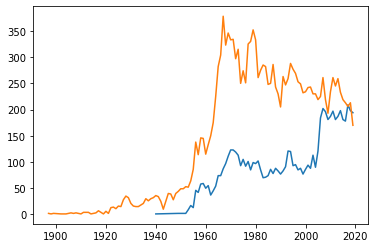

In [50]:
plt.plot(year_dis_album)
plt.plot(year_dis_song)
#orange = songs
#blue = albums

In [51]:
PARENT_GENRES = ["pop", 'rock', 'hip hop', 'latin', 'edm', 'r&b', 
                    'country', 'folk', 'classical', 'metal', 'jazz', 'easy listening', 'new age', 'blues', 'world']
    

In [52]:
def make_dictionaries(parent, fileName):
    assert parent in PARENT_GENRES, "The passed name should be a in PARENT_GENRES"
    
    return_dict = {}
        
    f = open(fileName, "r")
    for line in f:
        if line.strip() != "Explore" and line.strip() !="\n" and line.strip() != "":
      
            child_genre = line.strip().lower()
            return_dict[child_genre] = parent
       
            
    return return_dict

        

In [53]:
pop_dict = make_dictionaries("pop", "./data/pop_children.txt")
rock_dict = make_dictionaries("rock", "./data/rock_children.txt")
hip_hop_dict = make_dictionaries("hip hop", "./data/hip_hop_children.txt")
blues_dict = make_dictionaries("blues", "./data/blues_children.txt")
classical_dict = make_dictionaries("classical", "./data/classical_children.txt")
easy_listening_dict = make_dictionaries("easy listening", "./data/easy_listening_children.txt")
edm_dict = make_dictionaries("edm", "./data/edm_children.txt")
folk_dict = make_dictionaries("folk", "./data/folk_children.txt")
jazz_dict = make_dictionaries("jazz", "./data/jazz_children.txt")
latin_dict = make_dictionaries("latin", "./data/latin_children.txt")
metal_dict = make_dictionaries("metal", "./data/metal_children.txt")
new_age_dict = make_dictionaries("new age", "./data/new_age_children.txt")
r_n_b_dict = make_dictionaries("r&b", "./data/r&b_children.txt")
country_dict = make_dictionaries("country", "./data/country_children.txt")
world_dict = make_dictionaries("world", "./data/world_children.txt")

all_genres_dict = {**pop_dict,**rock_dict, **hip_hop_dict, **blues_dict, **classical_dict, 
                   **easy_listening_dict, **edm_dict, **folk_dict, **jazz_dict, **latin_dict,
                  **metal_dict, **new_age_dict, **r_n_b_dict, **country_dict, **world_dict}

In [54]:
def getArtistGenre(genres):
    '''
    This takes a list of possible genres for an artist from the spotify API
    ex. ['adult standards', 'brill building pop', 'easy listening', 'lounge']
    If a parent genre is in the list it will return that as the genre
    Otherwise it will loop through the genres, and analyze the children genres
    The majority parent genre of the children genre will determine the returned genre
    ex. if 5 of 7 genres parent genre is rock, rock will be returned
    '''
    PARENT_GENRES = ["pop", 'rock', 'hip hop', 'latin', 'edm', 'r&b', 
                    'country', 'folk', 'classical', 'metal', 'jazz', 'easy listening', 'new age', 'blues', 'world']
    
    returnGenre = ""
    
    #First check to see if a parent genre in list of spotify genres
    num_parents_in_genres = 0
    for g in genres:
        if g in PARENT_GENRES:
            returnGenre = g
            num_parents_in_genres+=1
            
    # Edge case two parent genres in a list (['dance pop', 'edm', 'pop', 'pop dance', 'pop rap'])
    # 1: count all of them and return the parent genre with most child genre
    
    if num_parents_in_genres == 1: #If only one parent genre included, return it
        return returnGenre
        
    #If a parent genre didn't show up OR more than one showed up count all genres
    genre_counts = {'pop':0, 
                    'rock':0, 
                    'hip hop':0, 
                    'latin': 0,
                    'edm': 0,
                    'r&b': 0,
                    'country': 0,
                    'folk': 0,
                    'classical': 0,
                    'metal': 0,
                    'jazz': 0,
                    'new age': 0,
                    'blues': 0,
                    'world': 0,
                    'easy listening': 0}
    
    
    for g in genres:
        try:
            parent = all_genres_dict[g]
            genre_counts[parent]+=1
        except:
            pass
        
    #TODO do we need to think about ties?
    max_genre = "no genre"
    max_genre_count = 0
    for p in PARENT_GENRES:
        if genre_counts[p] > max_genre_count:
            max_genre = p
            max_genre_count = genre_counts[p]
            
    returnGenre = max_genre
           
   
    return returnGenre
    
    

In [55]:
def getMostPopWord(lyrics):
    """
    Gets Called in count lyrics
    """

    text_tokens = word_tokenize(lyrics)
    lyrics_without_sw = [word for word in text_tokens if not word in stopwords.words()]
#     print(lyrics_without_sw)
    
    #I tried this. It seems to have some issues. For example, it converts 'us' to 'u'
    #This may not be the best option to get the most common words if the words aren't clearly recognizable
    
#     #Lemmatize the lyrics 
#     lmtzr = WordNetLemmatizer()
#     lem_lyrics = [[lmtzr.lemmatize(word) for word in word_tokenize(s)]
#               for s in lyrics_without_sw]
    
#     lem_lyrics_flat = []
#     for sublist in lem_lyrics:
#         lem_lyrics_flat.extend(sublist)
    
#     print(lem_lyrics_flat)
    
    c = Counter(lyrics_without_sw)
    return c.most_common(10)


def countLyrics(lyrics):
    """
    Takes in the output of 
    "\n \n   <|endoftext|>   \n \n".join([song.lyrics]))
    The first line is always the name of the song and the word lyrics
    There is always a number followed by embed on the last string
    Gets num lyrics, num unique lyrics, and specific word counts
    """
    
    #Remove the first line that has the title of the song and the word 'lyrics'
    split = lyrics.split("\n")
    del split[0]
    lyrics = "\n".join(split)
    
    pattern = r'\d*Embed'
    lyrics = re.sub(pattern, '', lyrics )
    
    pattern = r'You might also like'
    lyrics = re.sub(pattern, '', lyrics )

    
    #Convert to lower and remove non-alphnumeric chars
    lyrics = lyrics.lower()
    lyrics = re.sub(r'\W+', ' ', lyrics)   
    most_common_words = getMostPopWord(lyrics)
    
        
    #Parse most common words
    #get most common words (cw) and common word counts (cwc)
    try:
        cw1 = most_common_words[0][0]
        cw1c = most_common_words[0][1]
    except:
        cw1 = "NA"
        cw1c = 0
    
    try:
        cw2 = most_common_words[1][0]
        cw2c = most_common_words[1][1]
    except:
        cw2 = "NA"
        cw2c = 0
    
    try:
        cw3 = most_common_words[2][0]
        cw3c = most_common_words[2][1]
    except:
        cw3 = "NA"
        cw3c = 0
    
    try:
        cw4 = most_common_words[3][0]
        cw4c = most_common_words[3][1]
    except:
        cw4 = "NA"
        cw4c = 0
    
    try:
        cw5 = most_common_words[4][0]
        cw5c = most_common_words[4][1]
    except:
        cw5 = "NA"
        cw5c = 0
    
    try:
        cw6 = most_common_words[5][0]
        cw6c = most_common_words[5][1]
    except:
        cw6 = "NA"
        cw6c = 0
    
    try:
        cw7 = most_common_words[6][0]
        cw7c = most_common_words[6][1]
    except:
        cw7 = "NA"
        cw7c = 0
    
    try:
        cw8 = most_common_words[7][0]
        cw8c = most_common_words[7][1]
    except:
        cw8 = "NA"
        cw8c = 0
    
    try:
        cw9 = most_common_words[8][0]
        cw9c = most_common_words[8][1]
    except:
        cw9 = "NA"
        cw9c = 0
    
    try:
        cw10 = most_common_words[9][0]
        cw10c = most_common_words[9][1]
    except:
        cw10 = "NA"
        cw10c = 0
    

    #Count number of total lyrics and unique lyrics
    allWords = lyrics.split()
    num_unique = len(np.unique(allWords))
    total_words = len(allWords)
    

    #pattern matching
    
    #***************
    # LOVE
    #***************
    love_pattern = 'lov(e|ing|er|es|ely|ed)\\b'
    love_words = len(re.findall(love_pattern, lyrics))
    
    #***************
    # GOD
    #***************
    god_pattern = 'go(d|ds|ddes)\\b|jesus\\b|christ\\b'
    god_words = len(re.findall(god_pattern, lyrics))
    
    #***************
    # DANCE
    #***************
    dance_pattern = 'danc(e|es|ing|er)\\b'
    dance_words = len(re.findall(dance_pattern, lyrics))
    
    #***************
    # COOL
    #***************
    cool_pattern = 'coo(l|ler|lest)\\b'
    cool_words = len(re.findall(cool_pattern, lyrics))
    
    #***************
    # ROCK
    #***************
    rock_pattern = 'roc(k|ked|kers|ks|ker|king)\\b'
    rock_words = len(re.findall(rock_pattern, lyrics))
    
    #***************
    # SWEAR
    #***************
    swear_pattern = 'dam(n|ns|ned)\\b|fuc(k|ks|ked|ker|kers|king|kin)\\b|shi(t|ty|ts|ting|ter)\\b|hel(l|ls)\\b|bitc(h|hes|hen)\\b|bastar(d|ds)|as(s|es|shole|sholes)\\b'
    swear_words = len(re.findall(swear_pattern, lyrics))
    
    #***************
    # FAMILY
    #***************
    family_pattern = 'fa(m|mily|milies|)\\b|br(o|other|others)\\b|sis(ter|ters)\\b|so(n|ns)\\b|daugh(ter|ters)\\b|husban(d|ds)|wi(fe|ves)\\b|cousi(n|ns)\\b|uncl(e|es)\\b|aun(t|ts|ties)\\b'
    family_words = len(re.findall(family_pattern, lyrics))
    
    #***************
    # BABY
    #***************
    baby_pattern = 'ba(e|be|by|bies)\\b'
    baby_words = len(re.findall(baby_pattern, lyrics))
 

    #***************
    # MONEY
    #***************
    money_pattern = 'money\\b|cash\\b|doll(er|ers|a|az)\\b|buc(k|ks)\\b|coi(n|ns)\\b|bil(l|ls|lz)\\b'
    money_words = len(re.findall(money_pattern, lyrics))
    
    #***************
    # FUNKY
    #***************
    funky_pattern = 'fun(k|ky)\\b'
    funky_words = len(re.findall(funky_pattern, lyrics))
    
    #***************
    # CHILL
    #***************
    chill_pattern = 'chil(l|ls)\\b'
    chill_words = len(re.findall(chill_pattern, lyrics))
    
    
    
    
    
    return num_unique,total_words,love_words,god_words,dance_words,cool_words,rock_words,swear_words,family_words,baby_words,money_words,funky_words,chill_words,cw1,cw1c,cw2,cw2c,cw3,cw3c,cw4,cw4c,cw5,cw5c,cw6,cw6c,cw7,cw7c,cw8,cw8c,cw9,cw9c,cw10,cw10c
    
    
    

In [56]:
#Set up genius API
genius = lg.Genius('cPaJbcaz-llZE_G6jO_bHtcPFyJps_aiwumM5pF_xoPIBkmXHifU6lhHcOcbwOlY',  # Client access token from Genius Client API page
                             skip_non_songs=True, excluded_terms=["(Remix)", "(Live)"],
                             remove_section_headers=True, verbose = True,
                             timeout=15, sleep_time=5, retries = 2)

# genius.sleep_time = 45


In [57]:
#Set up spotify API
cid = '2d2d4ac665f543db93244d6799fc01bc'
secret = '43cd8ad30758405fa3291b1b45e944fd'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [58]:
album_num=0
csv_name = "albums_"+str(cur_album_start)+ "_"+ str(cur_album_end)+ ".csv"
csv_fail_name = "albums_"+str(cur_album_start)+ "_"+ str(cur_album_end)+ "_fail.csv"

#csv of failed songs
l = open("./input_data/"+csv_fail_name, "w+")
header = "album|track|artist|year|id|reasonFail\n"
l.write(header)

#csv of completed songs
f = open("./input_data/"+csv_name, "w+")
header = "song|artist|year|genre|numUnique|totalWords|love_words|god_words|dance_words|cool_words|rock_words|swear_words|family_words|baby_words|money_words|funky_words|chill_words|cw1|cwc1|cw2|cwc2|cw3|cwc3|cw4|cwc4|cw5|cwc5|cw6|cwc6|cw7|cwc7|cw8|cwc8|cw9|cwc9|cw10|cwc10\n"
f.write(header)

#Write a row for each song 
for index, row in current_albums.iterrows():
    
    album_num+=1
    print("______________\n")
    cur_artist = row['Artist']
    cur_album = row['Album']
    cur_year = row['Year']
    cur_row = row['PLACE']
    cur_id = index
    print(f"Row: {cur_row}\nAlbum: {cur_album}\nArtist: {cur_artist}\n______________")


    
    #Genius api
    #Get num word, num unique, specific word counts etc.
    retries = 0
    while retries < 3:
        try:
            
            
            #Use genius API 
            print(f"Getting album. Attempt number {retries}")
            album = genius.search_album(cur_album, cur_artist)
            print("Got album")
        
            #Spotify api
            #Get Genre
            print(f"Getting genre list. Attempt number {retries}")
            results = sp.search(q=cur_artist, type='artist')
            items = results['artists']['items']
            print("Got genre list")
            
            if len(items) > 0:
                cur_artist_genre = getArtistGenre(items[0]['genres'])
            else:
                cur_artist_genre = "no genre"
                
            print(f"Got parent genre: {cur_artist_genre}")
            track = 0
            print("Looping tracks")
            for i in album.tracks:
                track +=1
                cur_lyrics = i.song.lyrics
                
                if len(cur_lyrics.split()) > 15:                    
                    num_unique,total_words,love_words,god_words,dance_words,cool_words,rock_words, swear_words,family_words,baby_words,money_words,funky_words,chill_words,cw1,cw1c,cw2,cw2c,cw3,cw3c,cw4,cw4c,cw5,cw5c,cw6,cw6c,cw7,cw7c,cw8,cw8c,cw9,cw9c,cw10,cw10c= countLyrics(cur_lyrics)
                    #If everything works. Write the line to the file
                    line = f"{cur_album}|{cur_artist}|{cur_year}|{cur_artist_genre}|{num_unique}|{total_words}|{love_words}|{god_words}|{dance_words}|{cool_words}|{rock_words}|{swear_words}|{family_words}|{baby_words}|{money_words}|{funky_words}|{chill_words}|{cw1}|{cw1c}|{cw2}|{cw2c}|{cw3}|{cw3c}|{cw4}|{cw4c}|{cw5}|{cw5c}|{cw6}|{cw6c}|{cw7}|{cw7c}|{cw8}|{cw8c}|{cw9}|{cw9c}|{cw10}|{cw10c}\n"
                    f.write(line)
                    
                else:
                    line = f"{cur_album}|{track}|{cur_artist}|{cur_year}|{cur_id}|too_few_lyrics\n"
                    l.write(line)
                    

        except Timeout as e:
            print(retries)
            retries += 1
            continue
            
        except ConnectionError as cr:
            line = f"{cur_album}|{0}|{cur_artist}|{cur_year}|{cur_id}|time_out\n"
            l.write(line)
            
        except AssertionError as ae: #If we can't find the song, keep track of that song/artist/id
            line = f"{cur_album}|{0}|{cur_artist}|{cur_year}|{cur_id}|not_found\n"
            l.write(line)
            
        except AttributeError as ae: #If we can't find the song, keep track of that song/artist/id
            line = f"{cur_album}|{0}|{cur_artist}|{cur_year}|{cur_id}|not_found\n"
            l.write(line)
            
            
            
        
            


            
        break
        
    if retries >= 3: #If we time out 3 times, keep track and move on
        line = f"{cur_album}|{track}|{cur_artist}|{cur_year}|{cur_id}|time_out\n"
        l.write(line)
        
f.close()
l.close()



______________

Row: 1885.0
Album: Wild Tchoupitoulas
Artist: Wild Tchoupitoulas
______________
Getting album. Attempt number 0
Searching for "Wild Tchoupitoulas" by Wild Tchoupitoulas...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: no genre
Looping tracks
______________

Row: 1886.0
Album: Curtis/Live!
Artist: Curtis Mayfield
______________
Getting album. Attempt number 0
Searching for "Curtis/Live!" by Curtis Mayfield...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
______________

Row: 1887.0
Album: Young Loud and Snotty
Artist: Dead Boys
______________
Getting album. Attempt number 0
Searching for "Young Loud and Snotty" by Dead Boys...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 1888.0
Album: Jesus Christ Superstar
Artist: The Original London Concept Recording
______________
Getting album. Attempt number 0
Searching fo

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 1913.0
Album: Children of God
Artist: Swans
______________
Getting album. Attempt number 0
Searching for "Children of God" by Swans...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 1914.0
Album: The Private Press
Artist: DJ Shadow
______________
Getting album. Attempt number 0
Searching for "The Private Press" by DJ Shadow...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
______________

Row: 1915.0
Album: ANIMA
Artist: Thom Yorke
______________
Getting album. Attempt number 0
Searching for "ANIMA" by Thom Yorke...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 1916.0
Album: The Crying Light
Artist: Antony and The Johnsons
______________
Getting album. Attempt number

______________

Row: 1942.0
Album: New Moon Daughter
Artist: Cassandra Wilson
______________
Getting album. Attempt number 0
Searching for "New Moon Daughter" by Cassandra Wilson...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 1943.0
Album: Up
Artist: R.E.M.
______________
Getting album. Attempt number 0
Searching for "Up" by R.E.M....
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 1944.0
Album: The Lonesome Jubilee
Artist: John Mellencamp
______________
Getting album. Attempt number 0
Searching for "The Lonesome Jubilee" by John Mellencamp...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 1945.0
Album: Trio
Artist: Trio
______________
Getting album. Attempt number 0
Searching for "Trio" by Trio...
Got album
Getting genre list. Attempt number 0
Got genre list
Got pa

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 1971.0
Album: Scott 3
Artist: Scott Walker
______________
Getting album. Attempt number 0
Searching for "Scott 3" by Scott Walker...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
______________

Row: 1972.0
Album: Dinah Jams
Artist: Dinah Washington
______________
Getting album. Attempt number 0
Searching for "Dinah Jams" by Dinah Washington...
No results found for: 'Dinah Jams Dinah Washington'
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: easy listening
Looping tracks
______________

Row: 1973.0
Album: Holy Diver
Artist: Dio
______________
Getting album. Attempt number 0
Searching for "Holy Diver" by Dio...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: metal
Looping tracks
______________

Row: 1974.0
Album: Tarkus
Artist: Emerson, Lake & Palmer


Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 1999.0
Album: Blues de la frontera
Artist: Pata Negra
______________
Getting album. Attempt number 0
Searching for "Blues de la frontera" by Pata Negra...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: latin
Looping tracks
______________

Row: 2000.0
Album: Search for the New Land
Artist: Lee Morgan
______________
Getting album. Attempt number 0
Searching for "Search for the New Land" by Lee Morgan...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2001.0
Album: The Ecstatic
Artist: Mos Def
______________
Getting album. Attempt number 0
Searching for "The Ecstatic" by Mos Def...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
______________

Row: 2002.0
Album: Signing Off
Artist: UB40
______________
Getting album. Attempt number 0
Searching for "Signing O

Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2029.0
Album: Something Else!!!!
Artist: Ornette Coleman
______________
Getting album. Attempt number 0
Searching for "Something Else!!!!" by Ornette Coleman...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2030.0
Album: Vanishing Point
Artist: Primal Scream
______________
Getting album. Attempt number 0
Searching for "Vanishing Point" by Primal Scream...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2031.0
Album: Leaves Turn Inside You
Artist: Unwound
______________
Getting album. Attempt number 0
Searching for "Leaves Turn Inside You" by Unwound...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2032.0
Album: Queens of the Stone Age
Artist: Queens of the Stone Age
______________
Getting album

Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2059.0
Album: Journal for Plague Lovers
Artist: Manic Street Preachers
______________
Getting album. Attempt number 0
Searching for "Journal for Plague Lovers" by Manic Street Preachers...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2060.0
Album: Storia di un Minuto
Artist: PFM
______________
Getting album. Attempt number 0
Searching for "Storia di un Minuto" by PFM...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: no genre
Looping tracks
______________

Row: 2061.0
Album: janet.
Artist: Janet Jackson
______________
Getting album. Attempt number 0
Searching for "janet." by Janet Jackson...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
______________

Row: 2062.0
Album: Hair
Artist: The Original Broadway Cast
______________
Getting album. Attempt number 

Got genre list
Got parent genre: hip hop
Looping tracks
______________

Row: 2087.0
Album: Empyrean Isles
Artist: Herbie Hancock
______________
Getting album. Attempt number 0
Searching for "Empyrean Isles" by Herbie Hancock...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2088.0
Album: Yield
Artist: Pearl Jam
______________
Getting album. Attempt number 0
Searching for "Yield" by Pearl Jam...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2089.0
Album: Introspective
Artist: Pet Shop Boys
______________
Getting album. Attempt number 0
Searching for "Introspective" by Pet Shop Boys...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2090.0
Album: People in Sorrow
Artist: Art Ensemble of Chicago
______________
Getting album. Attempt number 0
Searching for "People in Sorr

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: edm
Looping tracks
______________

Row: 2116.0
Album: Foxbase Alpha
Artist: Saint Etienne
______________
Getting album. Attempt number 0
Searching for "Foxbase Alpha" by Saint Etienne...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 2117.0
Album: No More Shall We Part
Artist: Nick Cave & The Bad Seeds
______________
Getting album. Attempt number 0
Searching for "No More Shall We Part" by Nick Cave & The Bad Seeds...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2118.0
Album: Love Wars
Artist: Womack and Womack
______________
Getting album. Attempt number 0
Searching for "Love Wars" by Womack and Womack...
No results found for: 'Love Wars Womack and Womack'
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
_______

No results found for: 'Punch the Clock Elvis Costello and The Attractions'
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2143.0
Album: The Haunted Man
Artist: Bat for Lashes
______________
Getting album. Attempt number 0
Searching for "The Haunted Man" by Bat for Lashes...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 2144.0
Album: Please
Artist: Pet Shop Boys
______________
Getting album. Attempt number 0
Searching for "Please" by Pet Shop Boys...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2145.0
Album: La canción de Juan Perro
Artist: Radio Futura
______________
Getting album. Attempt number 0
Searching for "La canción de Juan Perro" by Radio Futura...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: latin
Looping tracks
_________

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 2172.0
Album: Slipknot
Artist: Slipknot
______________
Getting album. Attempt number 0
Searching for "Slipknot" by Slipknot...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: metal
Looping tracks
______________

Row: 2173.0
Album: Cloud Nine
Artist: The Temptations
______________
Getting album. Attempt number 0
Searching for "Cloud Nine" by The Temptations...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
______________

Row: 2174.0
Album: La revancha del tango
Artist: Gotan Project
______________
Getting album. Attempt number 0
Searching for "La revancha del tango" by Gotan Project...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: world
Looping tracks
______________

Row: 2175.0
Album: Safe in the Hands of Love
Artist: Yves Tumor
______________
Getting

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
______________

Row: 2201.0
Album: Chicken Skin Music
Artist: Ry Cooder
______________
Getting album. Attempt number 0
Searching for "Chicken Skin Music" by Ry Cooder...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: blues
Looping tracks
______________

Row: 2202.0
Album: Blinking Lights and Other Revelations
Artist: Eels
______________
Getting album. Attempt number 0
Searching for "Blinking Lights and Other Revelations" by Eels...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 2203.0
Album: Still Bill
Artist: Bill Withers
______________
Getting album. Attempt number 0
Searching for "Still Bill" by Bill Withers...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
______________

Row: 2204.0
Album: Stephen Stills
Artist: Stephen Stills


______________

Row: 2229.0
Album: Larks' Tongues in Aspic
Artist: King Crimson
______________
Getting album. Attempt number 0
Searching for "Larks' Tongues in Aspic" by King Crimson...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2230.0
Album: Music from the Unrealized Film Script, Dusk at Cubist Castle
Artist: The Olivia Tremor Control
______________
Getting album. Attempt number 0
Searching for "Music from the Unrealized Film Script, Dusk at Cubist Castle" by The Olivia Tremor Control...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2231.0
Album: Viva Last Blues
Artist: Palace Music
______________
Getting album. Attempt number 0
Searching for "Viva Last Blues" by Palace Music...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: country
Looping tracks
______________

Row: 2232.0
Album: Short Sharp Shocked


Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2259.0
Album: Eagles
Artist: Eagles
______________
Getting album. Attempt number 0
Searching for "Eagles" by Eagles...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2260.0
Album: La mémoire neuve
Artist: Dominique A.
______________
Getting album. Attempt number 0
Searching for "La mémoire neuve" by Dominique A....
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 2261.0
Album: Nothing Was the Same
Artist: Drake
______________
Getting album. Attempt number 0
Searching for "Nothing Was the Same" by Drake...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
______________

Row: 2262.0
Album: Peter Green's Fleetwood Mac
Artist: Fleetwood Mac
______________
Getting album. Attem

Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2288.0
Album: Handsworth Revolution
Artist: Steel Pulse
______________
Getting album. Attempt number 0
Searching for "Handsworth Revolution" by Steel Pulse...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: edm
Looping tracks
______________

Row: 2289.0
Album: Funcrusher Plus
Artist: Company Flow
______________
Getting album. Attempt number 0
Searching for "Funcrusher Plus" by Company Flow...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
______________

Row: 2290.0
Album: Love & Hate
Artist: Michael Kiwanuka
______________
Getting album. Attempt number 0
Searching for "Love & Hate" by Michael Kiwanuka...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
______________

Row: 2291.0
Album: Multiply
Artist: Jamie Lidell
______________
Getting album. Attempt number 0
Searching for 

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 2318.0
Album: Bachelor No. 2 (Or the Last Remains of the Dodo)
Artist: Aimee Mann
______________
Getting album. Attempt number 0
Searching for "Bachelor No. 2 (Or the Last Remains of the Dodo)" by Aimee Mann...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
______________

Row: 2319.0
Album: Bows + Arrows
Artist: The Walkmen
______________
Getting album. Attempt number 0
Searching for "Bows + Arrows" by The Walkmen...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2320.0
Album: Apocalypse Dudes
Artist: Turbonegro
______________
Getting album. Attempt number 0
Searching for "Apocalypse Dudes" by Turbonegro...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2321.0
Album: To

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2348.0
Album: It's Only Rock 'n' Roll
Artist: The Rolling Stones
______________
Getting album. Attempt number 0
Searching for "It's Only Rock 'n' Roll" by The Rolling Stones...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2349.0
Album: Interstellar Space
Artist: John Coltrane
______________
Getting album. Attempt number 0
Searching for "Interstellar Space" by John Coltrane...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2350.0
Album: First and Last and Always
Artist: The Sisters of Mercy
______________
Getting album. Attempt number 0
Searching for "First and Last and Always" by The Sisters of Mercy...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: new age
Looping tracks
______________


Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
______________

Row: 2378.0
Album: Pleasures of the Harbor
Artist: Phil Ochs
______________
Getting album. Attempt number 0
Searching for "Pleasures of the Harbor" by Phil Ochs...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: folk
Looping tracks
______________

Row: 2379.0
Album: Odyshape
Artist: The Raincoats
______________
Getting album. Attempt number 0
Searching for "Odyshape" by The Raincoats...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2380.0
Album: Upstairs at Eric's
Artist: Yazoo
______________
Getting album. Attempt number 0
Searching for "Upstairs at Eric's" by Yazoo...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2381.0
Album: Sextant
Artist: Herbie Hancock
______________
Getting album. Atte

Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 2407.0
Album: Operation: Doomsday
Artist: MF Doom
______________
Getting album. Attempt number 0
Searching for "Operation: Doomsday" by MF Doom...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: hip hop
Looping tracks
______________

Row: 2408.0
Album: Small Faces/There Are But Four Small Faces
Artist: Small Faces
______________
Getting album. Attempt number 0
Searching for "Small Faces/There Are But Four Small Faces" by Small Faces...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2409.0
Album: Kelly Blue
Artist: Wynton Kelly
______________
Getting album. Attempt number 0
Searching for "Kelly Blue" by Wynton Kelly...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2410.0
Album: Aromanticism
Artist: Moses Sumney
______________
Getting alb

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2437.0
Album: Nightbirds
Artist: Labelle
______________
Getting album. Attempt number 0
Searching for "Nightbirds" by Labelle...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: r&b
Looping tracks
______________

Row: 2438.0
Album: Undercurrent
Artist: Bill Evans and Jim Hall
______________
Getting album. Attempt number 0
Searching for "Undercurrent" by Bill Evans and Jim Hall...
No results found for: 'Undercurrent Bill Evans and Jim Hall'
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2439.0
Album: Sheryl Crow
Artist: Sheryl Crow
______________
Getting album. Attempt number 0
Searching for "Sheryl Crow" by Sheryl Crow...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2440.0
Album: Nothing G

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: jazz
Looping tracks
______________

Row: 2466.0
Album: No Quarter - Unledded
Artist: Jimmy Page & Robert Plant
______________
Getting album. Attempt number 0
Searching for "No Quarter - Unledded" by Jimmy Page & Robert Plant...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2467.0
Album: Gonna Take a Miracle
Artist: Laura Nyro and Labelle
______________
Getting album. Attempt number 0
Searching for "Gonna Take a Miracle" by Laura Nyro and Labelle...
No results found for: 'Gonna Take a Miracle Laura Nyro and Labelle'
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: world
Looping tracks
______________

Row: 2468.0
Album: Clap Your Hands Say Yeah
Artist: Clap Your Hands Say Yeah
______________
Getting album. Attempt number 0
Searching for "Clap Your Hands Say Yeah" by Clap Your Hands Say Yeah...
Got album
G

Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: easy listening
Looping tracks
______________

Row: 2495.0
Album: 1965
Artist: The Afghan Whigs
______________
Getting album. Attempt number 0
Searching for "1965" by The Afghan Whigs...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: rock
Looping tracks
______________

Row: 2496.0
Album: Chaleur Humaine / Christine and The Queens
Artist: Christine and The Queens
______________
Getting album. Attempt number 0
Searching for "Chaleur Humaine / Christine and The Queens" by Christine and The Queens...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genre: pop
Looping tracks
______________

Row: 2497.0
Album: La ley del desierto, La ley del mar
Artist: Radio Futura
______________
Getting album. Attempt number 0
Searching for "La ley del desierto, La ley del mar" by Radio Futura...
Got album
Getting genre list. Attempt number 0
Got genre list
Got parent genr